### Importations

In [1]:
# numpy et pandas pour la manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour l'encodage des labels
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Supprimer les avertissements 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# liste des fichiers dans le répertoire des données
os.listdir("./Data/")

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [3]:
# Données d'entrainement
app_train = pd.read_csv("./Data/application_train.csv")
print("Dimensions des données d'entrainement :", app_train.shape)
app_train.head()

Dimensions des données d'entrainement : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Notes : The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).
Les données d'entrainement contiennent 307511 observations (chacun un prêt distinct) et 122 caractéristiques (variables) 

y compris la TARGET (l'étiquette que nous voulons prédire).

In [4]:
# Données de test
app_test = pd.read_csv("./Data/application_test.csv")
print("Dimensions des données de test :", app_test.shape)
app_test.head()

Dimensions des données de test : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Notes : The test set is considerably smaller and lacks a TARGET column.
 Le jeu de test est considérablement plus petit et ne contient pas de colonne TARGET.

### II - Analyse Exploratiore des Données (EDA)

L'EDA est un processus ouvert où nous calculons des statistiques et réalisons des figures pour trouver des tendances, des anomalies, des modèles ou des relations au sein des données. L'objectif de l'EDA est d'apprendre ce que nos données peuvent nous dire. Il commence généralement par une vue d'ensemble à haut niveau, puis se concentre sur des domaines spécifiques à mesure que nous trouvons des zones intrigantes dans les données. Les résultats peuvent être intéressants en eux-mêmes, ou ils peuvent être utilisés pour informer nos choix de modélisation, par exemple en nous aidant à décider quelles caractéristiques utiliser.

#### II.1 - Examinons la distribution de la colonne cible
La colonne target est ce que nous devons prédire : soit un 0 pour un prêt remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d'abord examiner le nombre de prêts dans chaque catégorie.

In [5]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

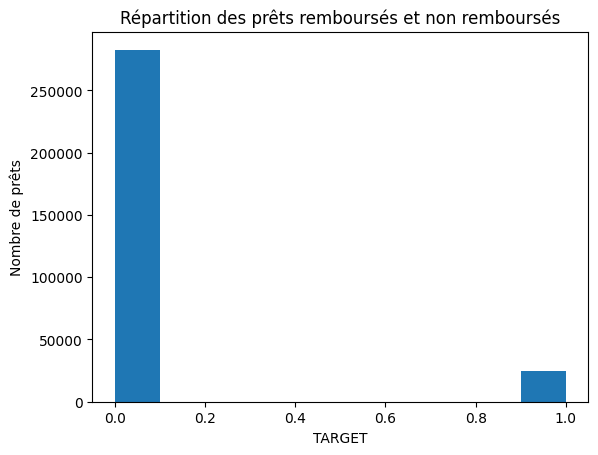

In [6]:
app_train['TARGET'].astype(int).plot.hist()
plt.title('Répartition des prêts remboursés et non remboursés')
plt.xlabel('TARGET')
plt.ylabel('Nombre de prêts')
plt.show()

#### Notes :

Pour cette information, nous voyons qu'il s'agit d'un problème de [classes déséquilibrées.](https://www.chioka.in/class-imbalance-problem/) Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrerons dans des modèles d'apprentissage automatique plus sophistiqués, nous pourrons [pondérer les classes](https://xgboost.readthedocs.io/en/latest/parameter.html) en fonction de leur représentation dans les données pour refléter ce déséquilibre.

#### II.2 - Examinons les valeurs manquantes dans les données d'entraînement

Après, nous pouvons examiner le nombre et le pourcentage de valeurs manquantes dans chaque colonne.

In [7]:
# Fonction pour calculer les valeurs manquantes par colonne
def missing_values_table(df):
        # Total des valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Pourcentage des valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Créer un tableau avec les résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renommer les colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% des valeurs totales'})
        
        # Trier le tableau par pourcentage de valeurs manquantes de manière décroissante
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% des valeurs totales', ascending=False).round(1)
        
        # Afficher quelques informations récapitulatives
        print ("Votre dataframe sélectionné a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # Retourner le dataframe avec les informations sur les valeurs manquantes
        return mis_val_table_ren_columns

In [8]:
# Statistiques des valeurs manquantes
missing_values = missing_values_table(app_train)
missing_values.head(20)

Votre dataframe sélectionné a 122 colonnes.
Il y a 67 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,% des valeurs totales
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


#### Notes :
Quand il sera temps de construire nos modèles d'apprentissage automatique, nous devrons remplir ces valeurs manquantes (connu sous le nom d'imputation). Dans un travail ultérieur, nous utiliserons des modèles tels que XGBoost qui peuvent [gérer les valeurs manquantes sans avoir besoin d'imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Une autre option serait de supprimer les colonnes avec un pourcentage élevé de valeurs manquantes, bien qu'il soit impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle. Par conséquent, nous conserverons toutes les colonnes pour l'instant.

#### II.3 - Types de colonne
Regardons le nombre de colonnes de chaque type de données. int64 et float64 sont des variables numériques (qui peuvent être [discrètes ou continues](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). Les colonnes d'objets contiennent des chaînes et sont des caractéristiques [catégorielles](https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/). 

In [9]:
# Nombre de colonnes par type de données
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

#### Notes : Regardons maintenant le nombre d'entrées uniques dans chacune des colonnes de type objet (catégorielles).

In [10]:
# Nombre de valeurs uniques dans les colonnes de type objet
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### Notes : 
La plupart des variables catégorielles ont un nombre relativement faible d'entrées uniques. Nous devrons trouver un moyen de gérer ces variables catégorielles !

#### II.4 - Encodage des variables catégorielles

Avant d'aller plus loin, nous devons gérer les variables catégorielles. Un modèle d'apprentissage automatique ne peut malheureusement pas gérer les variables catégorielles (sauf pour certains modèles tels que LightGBM). Par conséquent, nous devons trouver un moyen de coder (représenter) ces variables sous forme de nombres avant de les transmettre au modèle. Il existe deux principales façons de procéder à ce processus :

- Label encoding: assigner à chaque catégorie unique dans une variable catégorielle un entier. Aucune nouvelle colonne n'est créée.
- One-hot encoding : créer une nouvelle colonne pour chaque catégorie unique dans une variable catégorielle. Chaque observation reçoit un 1 dans la colonne correspondant à sa catégorie et un 0 dans toutes les autres nouvelles colonnes.

Le problème avec l'encodage des labels est qu'il donne aux catégories un ordre arbitraire. La valeur attribuée à chacune des catégories est aléatoire et ne reflète aucun aspect inhérent de la catégorie. Dans l'exemple ci-dessus, le programmeur reçoit un 4 et le data scientist un 1, mais si nous refaisons le même processus, les étiquettes pourraient être inversées ou complètement différentes. L'attribution réelle des entiers est arbitraire. Par conséquent, lorsque nous effectuons un encodage des labels, le modèle pourrait utiliser la valeur relative de la caractéristique (par exemple programmeur = 4 et data scientist = 1) pour attribuer des poids, ce qui n'est pas ce que nous voulons. Si nous n'avons que deux valeurs uniques pour une variable catégorielle (comme Homme/Femme), alors l'encodage des labels est correct, mais pour plus de 2 catégories uniques, l'encodage one-hot est l'option sûre.

Il y a un débat sur les mérites relatifs de ces approches, et certains modèles peuvent gérer les variables catégorielles encodées par des labels sans problème. Voici une bonne discussion sur [Stack Overflow](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). Je pense (et ce n'est qu'une opinion personnelle) que pour les variables catégorielles avec de nombreuses classes, l'encodage one-hot est l'approche la plus sûre car elle n'impose pas de valeurs arbitraires aux catégories. Le seul inconvénient de l'encodage one-hot est que le nombre de caractéristiques (dimensions des données) peut exploser avec des variables catégorielles ayant de nombreuses catégories. Pour y remédier, nous pouvons effectuer un encodage one-hot suivi d'une ACP ou d'[autres méthodes de réduction de dimensionnalité](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) pour réduire le nombre de dimensions (tout en essayant de préserver l'information).

Dans ce notebook, nous utiliserons l'encodage des labels pour les variables catégorielles avec seulement 2 catégories et l'encodage One-Hot pour les variables catégorielles avec plus de 2 catégories. Ce processus peut nécessiter des ajustements à mesure que nous avançons dans le projet, mais pour l'instant, nous verrons où cela nous mène. (Nous n'utiliserons pas non plus de réduction de dimensionnalité dans ce notebook, mais nous explorerons cette option dans de futures itérations).

##### a - Label Encoding et One-Hot Encoding

Implémentons la politique décrite ci-dessus : pour toute variable catégorielle (dtype == object) avec 2 catégories uniques, nous utiliserons l'encodage des labels, et pour toute variable catégorielle avec plus de 2 catégories uniques, nous utiliserons l'encodage one-hot.

Pour l'encodage des labels, nous utilisons le Scikit-Learn LabelEncoder et pour l'encodage one-hot, la fonction pandas get_dummies(df).

In [11]:
# Création d'une instance de LabelEncoder
le = LabelEncoder()
le_count = 0

# Itérer à travers les colonnes
for col in app_train:
    if app_train[col].dtype == 'object':
        # si la colonne a 2 ou moins de valeurs uniques
        if len(list(app_train[col].unique())) <= 2:
            # Entraîner sur les données d'entraînement
            le.fit(app_train[col])
            # Transformer à la fois les données d'entraînement et de test
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Garder une trace du nombre de colonnes encodées par label
            le_count += 1
            
print('%d colonnes ont été encodées par label.' % le_count)

3 colonnes ont été encodées par label.


In [12]:
# encodage one-hot des variables catégorielles
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Caractéristiques des données d\'entraînement : ', app_train.shape)
print('Caractéristiques des données de test : ', app_test.shape)

Caractéristiques des données d'entraînement :  (307511, 243)
Caractéristiques des données de test :  (48744, 239)


##### b - Aligner les données d'entraînement et de test

Il faut que les mêmes caractéristiques (colonnes) soient présentes à la fois dans les données d'entraînement et de test. L'encodage one-hot a créé plus de colonnes dans les données d'entraînement car certaines variables catégorielles avaient des catégories non représentées dans les données de test. Pour supprimer les colonnes des données d'entraînement qui ne sont pas dans les données de test, nous devons aligner les dataframes. Tout d'abord, nous extrayons la colonne cible des données d'entraînement (car elle n'est pas dans les données de test mais nous devons conserver cette information). Lorsque nous faisons l'alignement, nous devons nous assurer de définir axis = 1 pour aligner les dataframes en fonction des colonnes et non des lignes !

In [13]:
train_labels = app_train['TARGET']

# Aligner les dataframes d'entrainement et de test, en gardant seulement les colonnes qui sont présentes dans les deux dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Ajouter la cible à nouveau
app_train['TARGET'] = train_labels

print('Caractéristiques des données d\'entraînement : ', app_train.shape)
print('Caractéristiques des données de test : ', app_test.shape)


Caractéristiques des données d'entraînement :  (307511, 240)
Caractéristiques des données de test :  (48744, 239)


##### Notes :
Les jeux de données d'entraînement et de test ont maintenant les mêmes caractéristiques, ce qui est nécessaire pour l'apprentissage automatique. Le nombre de caractéristiques a considérablement augmenté en raison de l'encodage one-hot. À un moment donné, nous voudrons probablement essayer la [réduction de dimensionnalité (suppression des caractéristiques qui ne sont pas pertinentes)](https://en.wikipedia.org/wiki/Dimensionality_reduction) pour réduire la taille des jeux de données.

###  Retour a l'analyse exploratoire des données

#### II.5 Anomalies (Abération)

Un problème que nous devons toujours surveiller lors de l'analyse exploratoire des données (EDA) est la présence d'anomalies dans les données. Celles-ci peuvent être dues à des erreurs de saisie, des erreurs dans les équipements de mesure, ou elles peuvent être des mesures valides mais extrêmes. Une façon de soutenir quantitativement les anomalies est d'examiner les statistiques d'une colonne en utilisant la méthode describe. Les nombres dans la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la date actuelle de la demande de prêt. Pour voir ces statistiques en années, nous pouvons multiplier par -1 et diviser par le nombre de jours dans une année.

In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

##### Notes : Ces âges semblent raisonnables. Il n'y a pas de valeurs aberrantes pour l'âge, ni en haut ni en bas. Qu'en est-il des jours d'emploi ?

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

##### Notes : Ceci n'a pas l'air correct ! La valeur maximale (en dehors d'être positive) est d'environ 1000 ans !

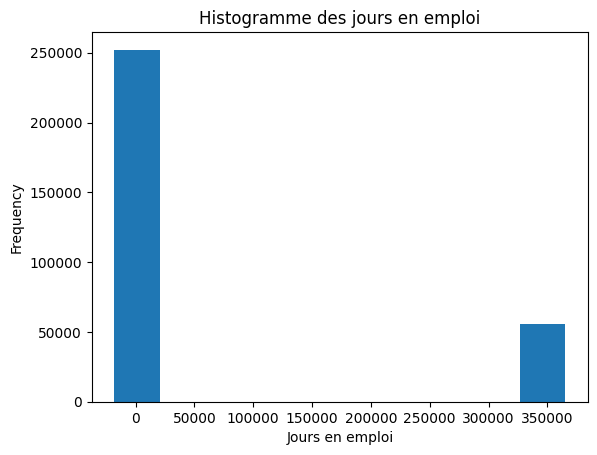

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours en emploi');
plt.xlabel('Jours en emploi');

##### Notes : Juste par curiosité, sous-échantillonnons les clients anormaux et voyons s'ils ont tendance à avoir des taux de défaut plus élevés ou plus faibles que le reste des clients.

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('Les non-anomalies ont un taux de défaut de %0.2f%%' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies ont un taux de défaut de %0.2f%%' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours d\'emploi anormaux' % len(anom))

Les non-anomalies ont un taux de défaut de 8.66%
Les anomalies ont un taux de défaut de 5.40%
Il y a 55374 jours d'emploi anormaux


##### Notes : Bien, c'est extrêmement intéressant ! Il s'avère que les anomalies ont un taux de défaut plus faible.

Les anomalies dépendent de la situation exacte, sans règles établies. L'une des approches les plus sûres consiste simplement à définir les anomalies comme une valeur manquante, puis à les remplir (en utilisant l'imputation) avant l'apprentissage automatique. Dans ce cas, puisque toutes les anomalies ont la même valeur exacte, nous voulons les remplir avec la même valeur au cas où tous ces prêts partageraient quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, nous voulons donc informer le modèle d'apprentissage automatique si nous avons effectivement rempli ces valeurs. Comme solution, nous allons remplir les valeurs anormales avec "not a number" (np.nan) puis créer une nouvelle colonne booléenne indiquant si la valeur était anormale ou non.

Text(0.5, 0, "Jours d'emploi")

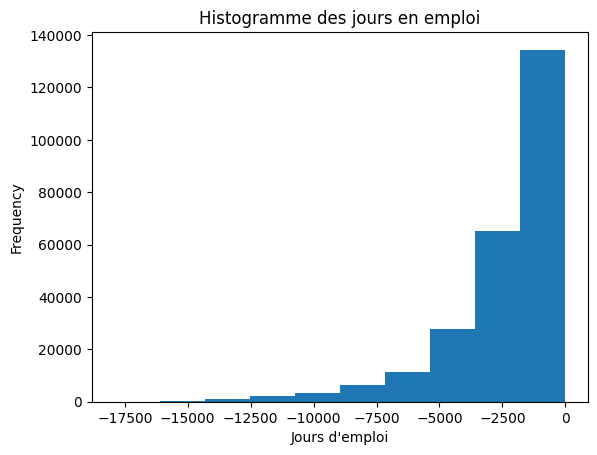

In [18]:
# Creation d'un flag d'anomalie
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replacons les valeurs anormales par nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours en emploi')
plt.xlabel('Jours d\'emploi')

##### Notes : 

La distribution semble être beaucoup plus conforme à ce à quoi nous nous attendions, et nous avons également créé une nouvelle colonne pour informer le modèle que ces valeurs étaient à l'origine anormales (car nous devrons remplir les nans avec une certaine valeur, probablement la médiane de la colonne). Les autres colonnes avec DAYS dans le dataframe semblent être conformes à ce à quoi nous nous attendons, sans valeurs aberrantes évidentes.

Note importante : tout ce que nous faisons aux données d'entraînement doit également être fait aux données de test. Assurons-nous de créer la nouvelle colonne et de remplir la colonne existante avec np.nan dans les données de test.

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans les données de test sur un total de %d entrées' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

Il y a 9274 anomalies dans les données de test sur un total de 48744 entrées


#### II.6 - Correlations

Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'EDA. Une façon d'essayer de comprendre les données est de rechercher des corrélations entre les caractéristiques et la cible. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la cible en utilisant la méthode .corr du dataframe.

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la "pertinence" d'une caractéristique, mais il nous donne une idée des relations possibles au sein des données. Quelques [interprétations générales de la valeur absolue du coefficient de corrélation](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) sont :
- 0.00-0.19 : très faible
- 0.20-0.39 : faible
- 0.40-0.59 : modéré
- 0.60-0.79 : fort
- 0.80-1.0 : très fort

In [20]:
# Recherche des corrélations avec la cible et tri
correlations = app_train.corr()['TARGET'].sort_values()

# Affichage des corrélations
print('Plus grandes corrélations positives :\n', correlations.tail(15))
print('\nPlus grandes corrélations négatives :\n', correlations.head(15))

Plus grandes corrélations positives :
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

P

##### Notes :
Prenons une vision plus approfondie de certaines des corrélations les plus significatives : DAYS_BIRTH est la corrélation positive la plus élevée. (sauf pour TARGET car la corrélation d'une variable avec elle-même est toujours de 1 !) En regardant la documentation, DAYS_BIRTH est l'âge en jours du client au moment du prêt en jours négatifs (pour une raison quelconque !). La corrélation est positive, mais la valeur de cette caractéristique est en fait négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire que la cible == 0). C'est un peu déroutant, nous allons donc prendre la valeur absolue de la caractéristique et la corrélation sera alors négative.

#### Effet de l'âge sur le remboursement

In [21]:
# Recherche de la corrélation entre les jours positifs depuis la naissance et la cible
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

##### Notes :
Plus le client vieillit, plus il y a une relation linéaire négative avec la cible, ce qui signifie qu'à mesure que les clients vieillissent, ils ont tendance à rembourser leurs prêts à temps plus souvent.

Commencons par examiner cette variable. Tout d'abord, nous pouvons faire un histogramme de l'âge. Nous mettrons l'axe x en années pour rendre le graphique un peu plus compréhensible.

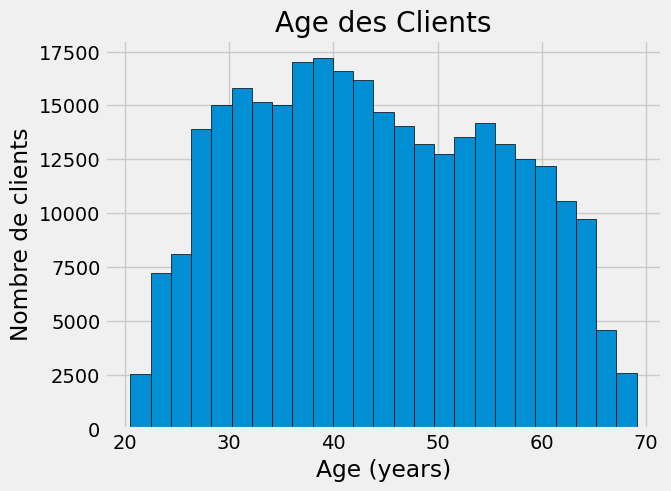

In [22]:
# Définir le style des graphiques
plt.style.use('fivethirtyeight')

# Plot de la distribution des âges en années
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age des Clients')
plt.xlabel('Age (years)')
plt.ylabel('Nombre de clients')
plt.show()

##### Notes :

par contre, la distribution de l'âge ne nous dit pas grand-chose d'autre que le fait qu'il n'y a pas de valeurs aberrantes, car tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite réaliser un [tracé d'estimation de densité de noyau](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) coloré par la valeur de la cible. Un [tracé d'estimation de densité de noyau montre la distribution d'une seule variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement un gaussien, à chaque point de données, puis en moyennant tous les noyaux individuels pour développer une seule courbe lisse). Nous utiliserons le seaborn kdeplot pour ce graphique.

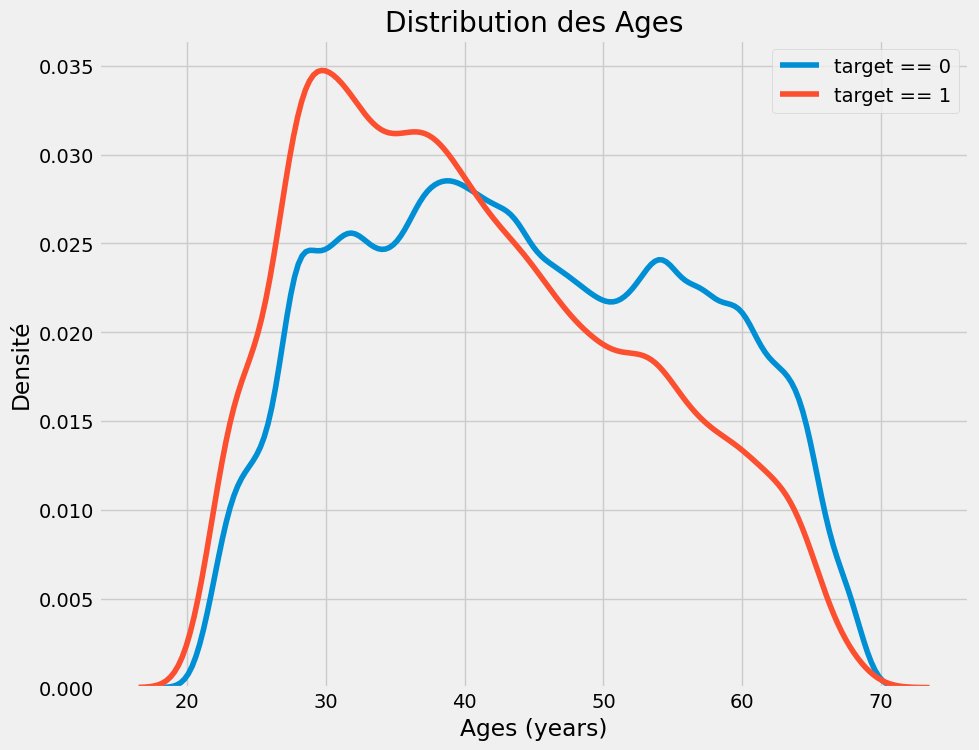

In [23]:
plt.figure(figsize = (10, 8))

# KDE plot des prêts remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot des prêts non remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Ages (years)')
plt.ylabel('Densité')
plt.title('Distribution des Ages')

# Ajout de la légende
plt.legend()
plt.show()

##### Notes :

Le target == 1 montre une tendance vers les âges plus jeunes. Bien que ce ne soit pas une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Examinons cette relation d'une autre manière : le taux moyen de défaut de remboursement des prêts par tranche d'âge.

Pour construire ce graphique, nous découpons d'abord la catégorie d'âge en intervalles de 5 ans chacun. Ensuite, pour chaque intervalle, nous calculons la valeur moyenne de la cible, ce qui nous indique le ratio des prêts qui n'ont pas été remboursés dans chaque catégorie d'âge.

In [24]:
# Information sur l'âge dans un dataframe séparé
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Créer des bacs d'âge
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# groupons par les bacs et calculons les moyennes
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


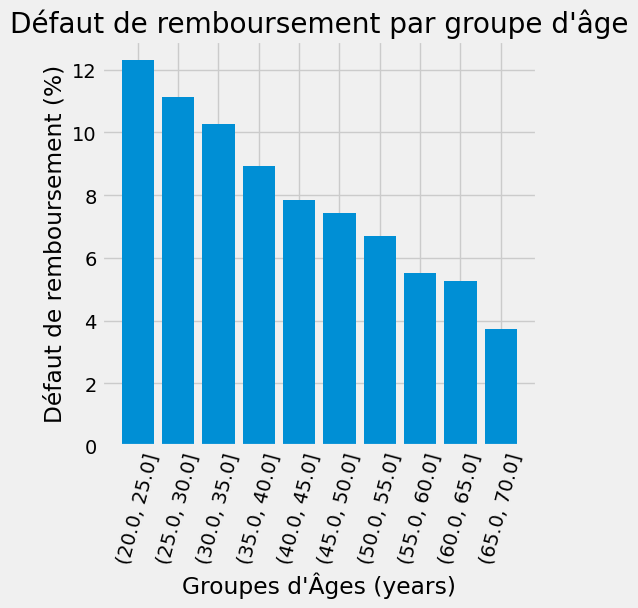

In [26]:
plt.figure(figsize = (5, 5))

# graphique en barres du taux de défaut par groupe d'âge
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel("Groupes d'Âges (years)")
plt.ylabel('Défaut de remboursement (%)')
plt.title('Défaut de remboursement par groupe d\'âge');

##### Notes :

Il y'a une tendance claire: les demandeurs plus jeunes sont plus susceptibles de ne pas rembourser le prêt! Le taux de défaut de remboursement est supérieur à 10% pour les trois groupes d'âge les plus jeunes et inférieur à 5% pour le groupe d'âge le plus âgé.

Cette information pourrait être directement utilisée par la banque : comme les clients plus jeunes sont moins susceptibles de rembourser le prêt, ils devraient peut-être recevoir plus de conseils ou d'astuces en matière de planification financière. Cela ne signifie pas que la banque devrait discriminer les clients plus jeunes, mais il serait judicieux de prendre des mesures de précaution pour aider les clients plus jeunes à payer à temps.

#### II.7 - Sources externe

Les 3 variables ayant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un "score normalisé provenant d'une source de données externe". Je ne suis pas sûr de ce que cela signifie exactement, mais cela peut être une sorte de cote de crédit cumulative réalisée à l'aide de nombreuses sources de données.

Jetons un coup d'œil à ces variables.

Dans un premier temps, nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [36]:
# Extraction des variables EXT_SOURCE et affichage des corrélations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


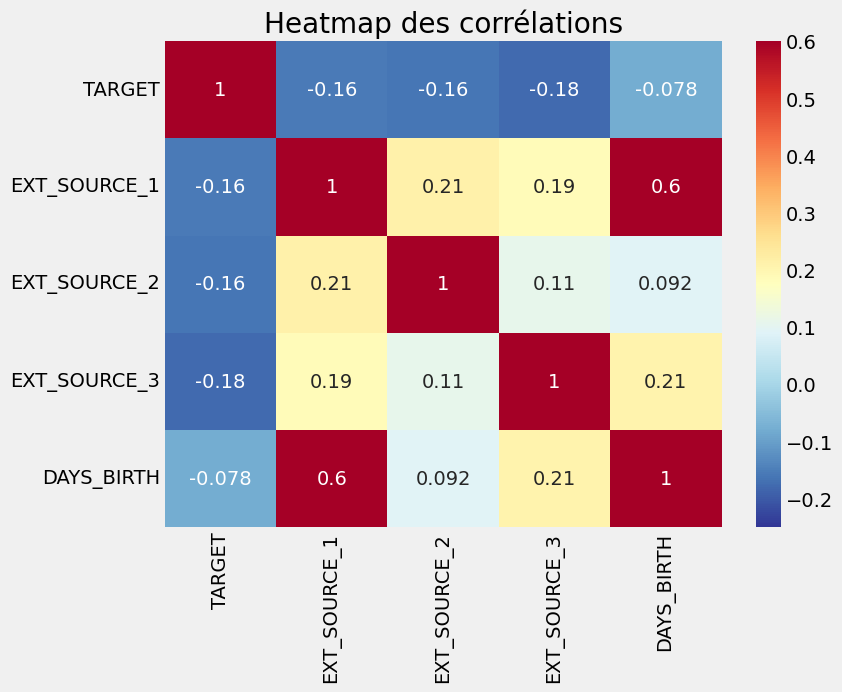

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap des correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Heatmap des corrélations')

##### Notes :

Tout les trois fonctionnalités EXT_SOURCE ont des corrélations négatives avec la cible, indiquant que lorsque la valeur de l'EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que peut-être l'un des facteurs de ce score est l'âge du client.

Nous pouvons examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

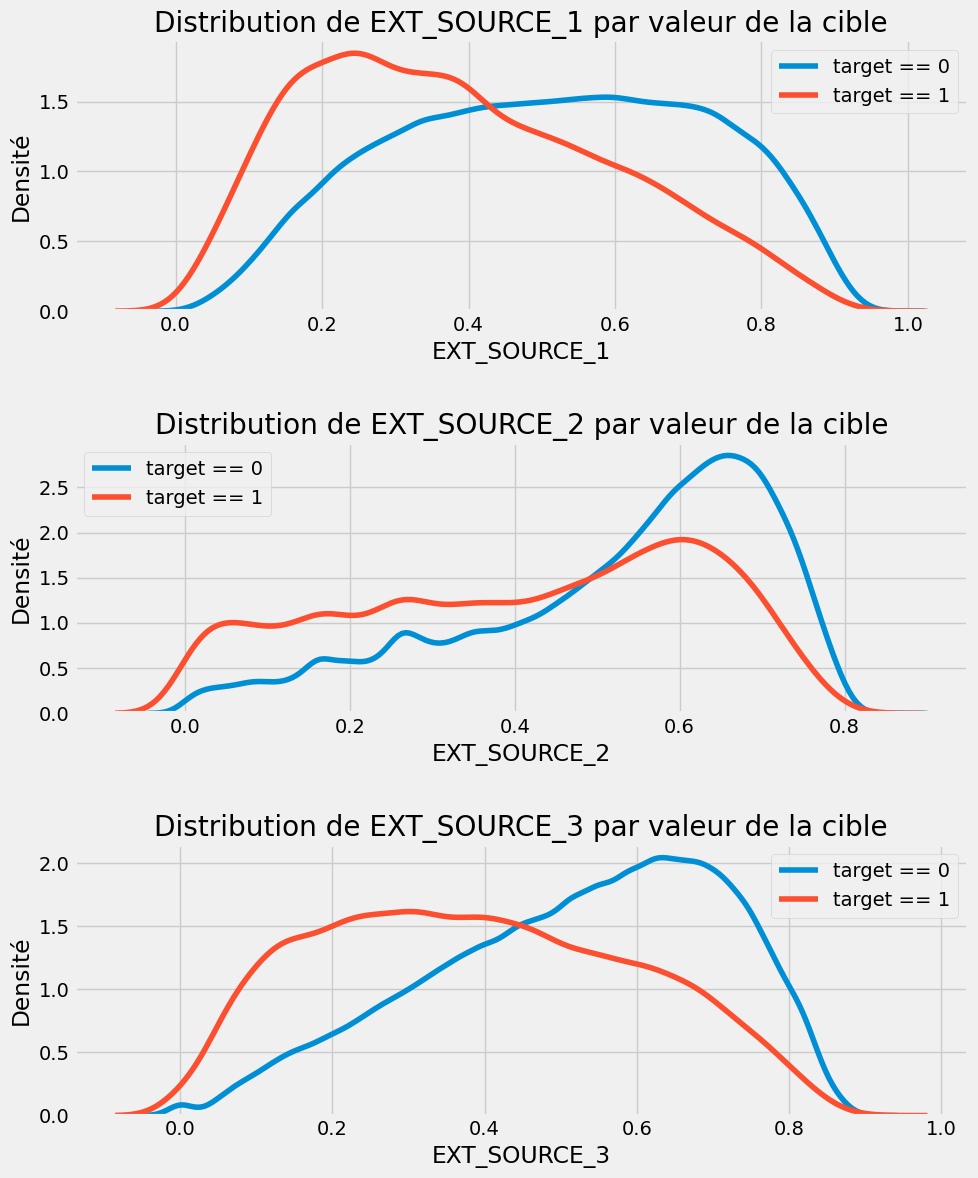

In [ ]:
plt.figure(figsize = (10, 12))

# Itération sur les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Creéation d'un nouveau subplot pour chaque source
    plt.subplot(3, 1, i + 1)
    # plot des prêts remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot des prêts non remboursés
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Étiquetage des graphiques
    plt.title('Distribution de %s par valeur de la cible' % source)
    plt.xlabel('%s' % source); plt.ylabel('Densité')
    plt.legend()
plt.tight_layout(h_pad = 2.5)

##### Notes : 

EXT_SOURCE_3 montre la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait, elles sont toutes considérées comme très faibles), mais ces variables seront toujours utiles pour un modèle d'apprentissage automatique pour prédire si un demandeur remboursera ou non un prêt à temps.

##### II.8 - Pairs Plot

Comme dernier graphique exploratoire, nous pouvons réaliser un graphique en [paires des variables](https://towardsdatascience.com) EXT_SOURCE et de la variable DAYS_BIRTH. Le graphique en paires est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables individuelles. Ici, nous utilisons la bibliothèque de visualisation seaborn et la fonction PairGrid pour créer un graphique en paires avec des nuages de points sur le triangle supérieur, des histogrammes sur la diagonale, et des tracés de densité 2D et des coefficients de corrélation sur le triangle inférieur.

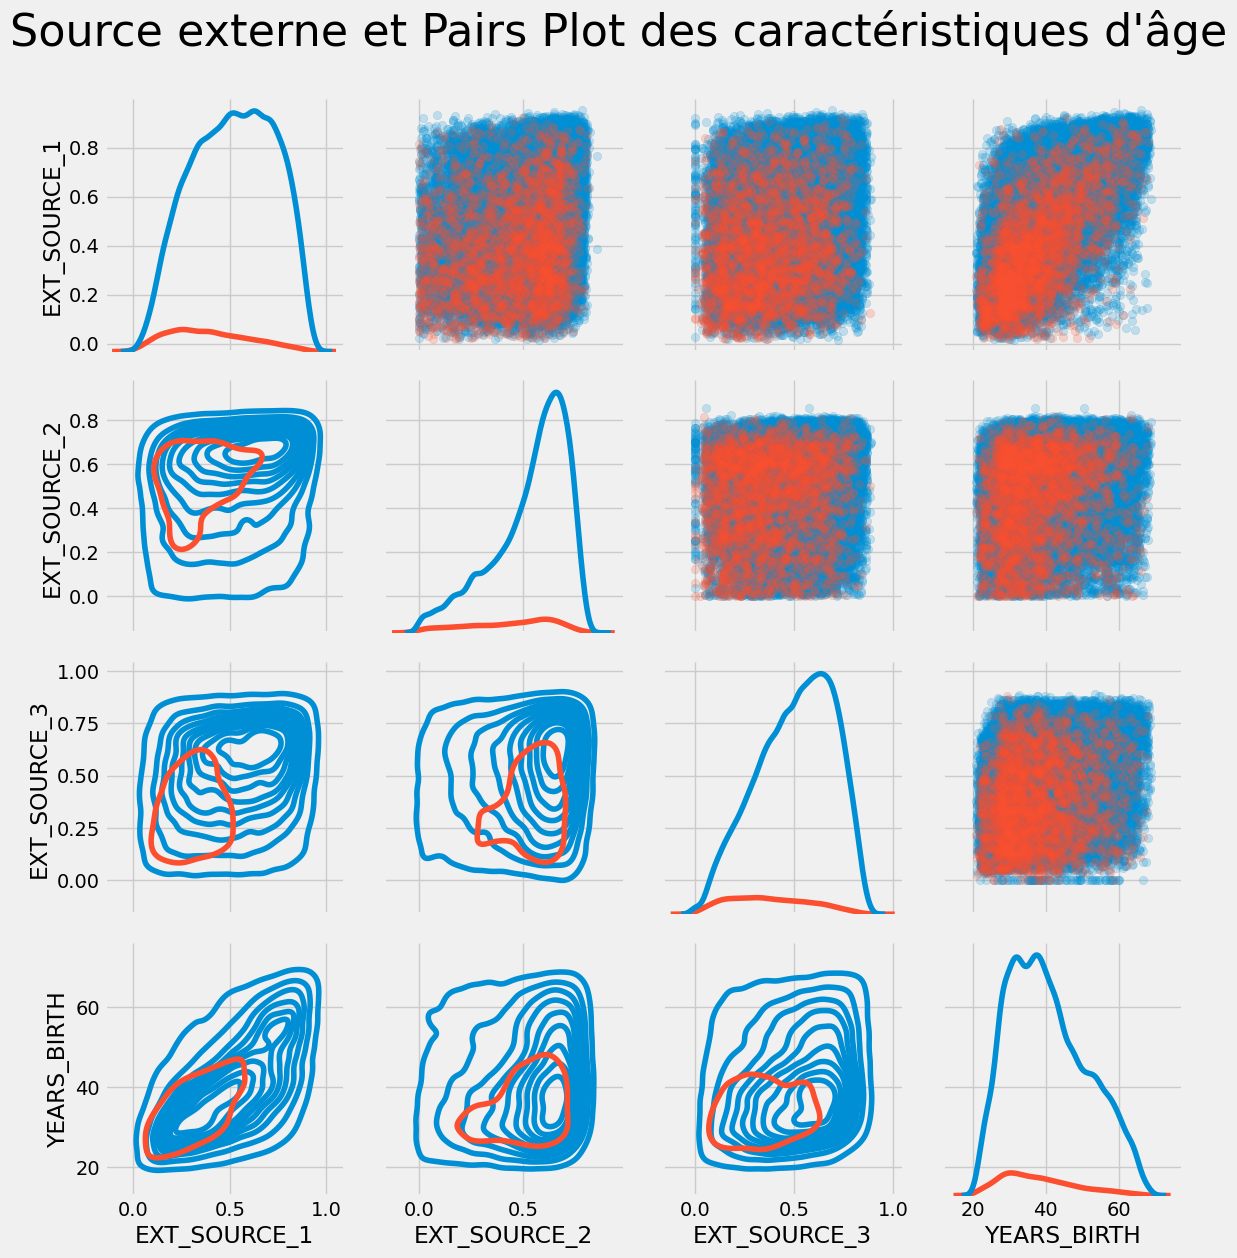

In [44]:
# Préparation des données pour le tracé
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Ajout de l'âge du client en années
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Suppression des valeurs manquantes et limitation aux 100000 premières lignes
plot_data = plot_data.dropna().loc[:100000, :]

# Fonction pour calculer le coefficient de corrélation entre deux colonnes
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Création de l'objet pairgrid
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# La partie supérieure est un nuage de points
grid.map_upper(plt.scatter, alpha = 0.2)

# La diagonale est un histogramme
grid.map_diag(sns.kdeplot)

# La partie inférieure est un tracé de densité
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Source externe et Pairs Plot des caractéristiques d\'âge', size = 32, y = 1.05);

##### Notes :

Sur ce graphique, le rouge indique les prêts qui n'ont pas été remboursés et le bleu ceux qui le sont. Nous pouvons voir les différentes relations au sein des données. Il semble y avoir une relation linéaire positive modérée entre EXT_SOURCE_1 et DAYS_BIRTH (ou équivalemment YEARS_BIRTH), indiquant que cette caractéristique peut prendre en compte l'âge du client.

Sur ce graphique, le rouge représente les prêts non remboursés et le bleu ceux remboursés.
Lorsque l’on observe la relation entre EXT_SOURCE_1 et l’âge (YEARS_BIRTH), on constate qu’il existe une tendance positive modérée : les personnes plus âgées ont en moyenne des scores EXT_SOURCE_1 plus élevés.
Cela suggère qu’EXT_SOURCE_1 capture indirectement des éléments liés à l’âge du client, sans pour autant que la relation soit fortement linéaire.

In [ ]:
# In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client.
# 